In [1]:
from rnamodif.data_utils.kmer_dataloader import MyKmerMixedDataset
pos_path_nia = '/home/jovyan/taiyaki_test/mapped_reads_2/m6A_33'
neg_path_nia = '/home/jovyan/taiyaki_test/mapped_reads_2/m6A_0'
pos_path = '/home/jovyan/taiyaki_test/mapped_reads_2/RNAAB090763_m6A'
neg_path = '/home/jovyan/taiyaki_test/mapped_reads_2/RNAAB089716_m6A_UNM'

novoa_train_dset = MyKmerMixedDataset(pos_path, neg_path,  max_kmer_len=70*5, batch_limit=[0], dont_pad=True, limit_avg_base=True)
nia_train_dset = MyKmerMixedDataset(pos_path_nia, neg_path_nia, max_kmer_len=70*5, batch_limit=[0], dont_pad=True, limit_avg_base=True)

novoa_valid_dset = MyKmerMixedDataset(pos_path, neg_path, max_kmer_len=70*5, batch_limit=[1], dont_pad=True, limit_avg_base=True)
# nia_valid_dset = MyKmerMixedDataset(pos_path_nia, neg_path_nia, max_kmer_len=70*5, batch_limit=[1], dont_pad=True, limit_avg_base=True)

['Batch_0', 'Batch_1']
processing Batch_0


100%|██████████| 25000/25000 [05:56<00:00, 70.13it/s]


dset size None
['Batch_0', 'Batch_1', 'Batch_2']
processing Batch_0


100%|██████████| 25000/25000 [05:17<00:00, 78.76it/s]  


dset size None
['Batch_0', 'Batch_1', 'Batch_2', 'Batch_3']
processing Batch_0


100%|██████████| 25000/25000 [03:14<00:00, 128.63it/s] 


dset size None
['Batch_0', 'Batch_1', 'Batch_2', 'Batch_3']
processing Batch_0


100%|██████████| 25000/25000 [03:20<00:00, 124.39it/s]


dset size None
['Batch_0', 'Batch_1']
processing Batch_1


100%|██████████| 16727/16727 [04:17<00:00, 65.03it/s] 


dset size None
['Batch_0', 'Batch_1', 'Batch_2']
processing Batch_1


100%|██████████| 25000/25000 [05:05<00:00, 81.91it/s]  

dset size None


In [2]:
# train_dset = novoa_train_dset
# valid_dset = novoa_valid_dset
# valid_dset = nia_valid_dset
all_datasets = [('novoa_train',novoa_train_dset), ('novoa_valid',novoa_valid_dset), ('nia_train',nia_train_dset)]#, ('nia_valid',nia_valid_dset)]

novoa_train
40976
[('AGCCG', 47773), ('GCTAC', 47715), ('CTCGT', 47637), ('TTTGG', 46050), ('TTGCA', 44252), ('ACCTG', 44236), ('GGTGC', 43794), ('TCGTG', 42931), ('CCATC', 40976), ('GCGCG', 40794)]
novoa_train
39145
[('GCTAC', 44415), ('CACTA', 43263), ('TGAGG', 41836), ('AGCTA', 41750), ('TGTAA', 40245), ('CGGAT', 40103), ('TATGG', 39881), ('ATATG', 39275), ('CCATC', 39145), ('CGCTC', 38257)]
novoa_valid
27672
[('GCTAC', 31989), ('CTCGT', 31832), ('AGCCG', 31791), ('TTTGG', 30419), ('TTGCA', 30006), ('GGTGC', 29431), ('ACCTG', 29159), ('TCGTG', 28837), ('CCATC', 27672), ('GCGCG', 27029)]
novoa_valid
39253
[('GCTAC', 45415), ('CACTA', 43375), ('AGCTA', 42376), ('TGAGG', 41704), ('CGGAT', 40325), ('TGTAA', 39982), ('CCATC', 39253), ('TATGG', 39140), ('CGCTC', 38758), ('ATATG', 38748)]
nia_train
26504
[('AGAAA', 105221), ('AAACC', 93695), ('TGACG', 87401), ('TTGAC', 85553), ('TTAAG', 80249), ('GTTTT', 79250), ('AGGTT', 79092), ('GGTTT', 77566), ('ACGAA', 77108), ('CGAAC', 76204)]
nia_tr

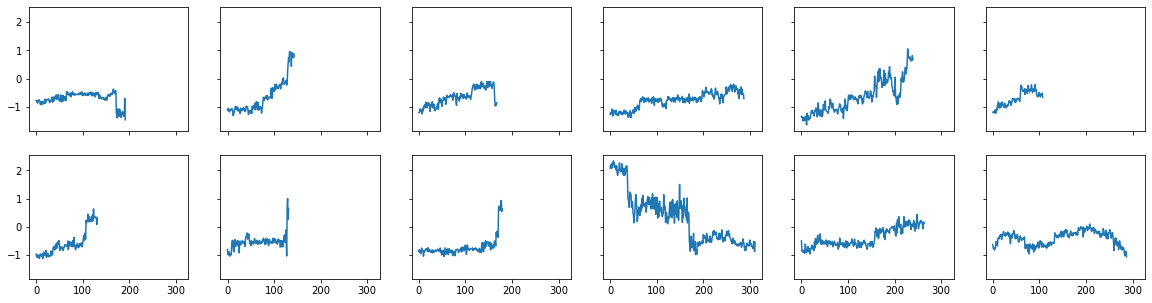

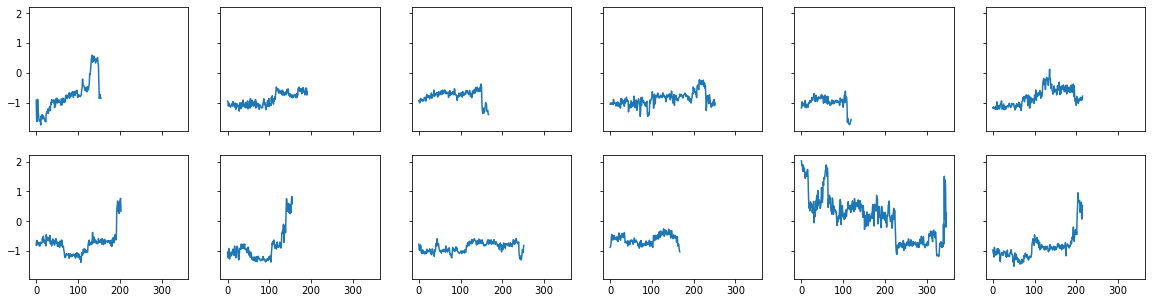

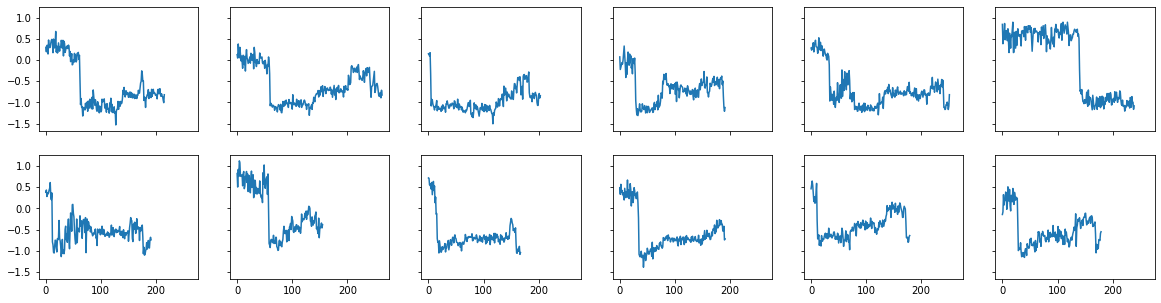

In [8]:
from matplotlib import pyplot as plt
samples = 6
for nickname, dset in all_datasets:
    splits = [dset.pos_dset, dset.neg_dset]
    fig, axs = plt.subplots(len(splits),samples, sharey=True, sharex=True, figsize=(20,5))
    for split in splits:
        split.change_kmer('CCATC')
        print(nickname)
        print(split.len)
        print(split.counts[:10])
    for i in range(samples):
        for j,d in enumerate(splits):
            ds = iter(d)
            axs[j][i].plot(next(ds)[0])
            fig.show()



In [16]:
from tslearn.utils import to_time_series_dataset
import numpy as np

def prepare(dset, samples):
    X = []
    y = []
    ds = iter(dset)
    for _ in range(samples):
        sig, lab = next(ds)
        X.append(sig)
        y.append(lab)
    X = to_time_series_dataset(X)
    y = np.array(y).flatten()
    return X,y

tnX,tny = prepare(novoa_train_dset, 1000)
vnX,vny = prepare(novoa_valid_dset, 1000)
thX,thy = prepare(nia_train_dset, 1000)
# vhX,vhy = prepare(nia_train_dset, 1000) #TODO reuse dataset (next 1000)



pos kmer CCATC
neg kmer CCATC
pos kmer CCATC
neg kmer CCATC
pos kmer CCATC
neg kmer CCATC


# Variable length time-series classification

In [17]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
print('Novoa data model')
for n in [2,3,5,10]:
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=n, n_jobs=64)
    knn.fit(tnX, tny)
    print(n, 'neighbors')
    print('novoa train acc', knn.score(tnX, tny))
    print('novoa valid acc', knn.score(vnX, vny))
    print('nih train acc', knn.score(thX, thy)) 
    
print('Nih data model')
for n in [2,3,5,10]:
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=n, n_jobs=64)
    knn.fit(thX, thy)
    print(n, 'neighbors')
    print('novoa train acc', knn.score(tnX, tny))
    print('novoa valid acc', knn.score(vnX, vny))
    print('nih train acc', knn.score(thX, thy)) 


Novoa data model
2 neighbors
novoa train acc 0.849
novoa valid acc 0.738
nih train acc 0.496
3 neighbors
novoa train acc 0.884
novoa valid acc 0.78
nih train acc 0.496
5 neighbors
novoa train acc 0.861
novoa valid acc 0.795
nih train acc 0.497
10 neighbors
novoa train acc 0.804
novoa valid acc 0.766
nih train acc 0.519
Nih data model
2 neighbors
novoa train acc 0.527
novoa valid acc 0.533
nih train acc 0.737
3 neighbors
novoa train acc 0.513
novoa valid acc 0.532
nih train acc 0.762
5 neighbors
novoa train acc 0.502
novoa valid acc 0.526
nih train acc 0.697
10 neighbors
novoa train acc 0.483
novoa valid acc 0.503
nih train acc 0.644


In [35]:
from tslearn.svm import TimeSeriesSVC
print('Novoa data model')
for kernel in ['gak']: #rbf, poly, sigmoid, not supported for variable length
    clf = TimeSeriesSVC(C=1.0, kernel=kernel, n_jobs=64)
    clf.fit(tnX, tny)
    print(kernel, 'kernel')
    print('novoa train acc', clf.score(tnX, tny))
    print('novoa valid acc', clf.score(vnX, vny))
    print('nih train acc', clf.score(thX, thy)) 
    
print('Nih data model')
for kernel in ['gak']: #rbf, poly, sigmoid, not supported for variable length
    clf = TimeSeriesSVC(C=1.0, kernel=kernel, n_jobs=64)
    clf.fit(thX, thy)
    print(kernel, 'kernel')
    print('novoa train acc', clf.score(tnX, tny))
    print('novoa valid acc', clf.score(vnX, vny))
    print('nih train acc', clf.score(thX, thy)) 

gak kernel
1.0
0.52


In [35]:
from tslearn.shapelets import LearningShapelets
clf = LearningShapelets(n_shapelets_per_size=None, max_iter=100, verbose=0)
clf.fit(np.nan_to_num(tX), ty) #TODO hotfix for NAN loss 
print(clf.score(np.nan_to_num(tX), ty))
print(clf.score(np.nan_to_num(vX), vy)) 

/home/jovyan/my-conda-envs/RNAmodEnvRod/lib/python3.8/site-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/100
4/4 [==============================] - 1s 24ms/step - loss: 0.9480 - binary_accuracy: 0.5000 - binary_crossentropy: 0.9480
Epoch 2/100
4/4 [==============================] - 0s 29ms/step - loss: 0.9327 - binary_accuracy: 0.5000 - binary_crossentropy: 0.9327
Epoch 3/100
4/4 [==============================] - 0s 33ms/step - loss: 0.9181 - binary_accuracy: 0.5000 - binary_crossentropy: 0.9181
Epoch 4/100
4/4 [==============================] - 0s 29ms/step - loss: 0.9041 - binary_accuracy: 0.5000 - binary_crossentropy: 0.9041
Epoch 5/100
4/4 [==============================] - 0s 28ms/step - loss: 0.8907 - binary_accuracy: 0.5000 - binary_crossentropy: 0.8907
Epoch 6/100
4/4 [==============================] - 0s 27ms/step - loss: 0.8780 - binary_accuracy: 0.5000 - binary_crossentropy: 0.8780
Epoch 7/100
4/4 [==============================] - 0s 29ms/step - loss: 0.8657 - binary_accuracy: 0.5000 - binary_crossentropy: 0.8657
Epoch 8/100
4/4 [==============================] - 0s 1

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import accuracy_score
from tslearn.clustering import KernelKMeans

num_of_cl = 2

clf = TimeSeriesKMeans(n_clusters=num_of_cl, max_iter=30, metric='euclidean', verbose=0, n_jobs=10)
# clf = KernelKMeans(n_clusters=num_of_cl, max_iter=5)
clf.fit(X)
# accuracy_score(y,clf.predict(X))
labels = clf.predict(X)
y = np.array(y)

for cluster in range(num_of_cl):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_labels = y[cluster_indices]
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    print(f"Cluster {cluster}: {len(cluster_indices)} data points")
    if(len(counts) > 0):
        print(' -',round(counts[0]/sum(counts),2), 'ratio of negatives')
    for label, count in zip(unique_labels, counts):
        print(f" - {count} data points with class label {int(label)}")